In [87]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder

In [88]:
df=pd.read_csv("C:\\Users\\samri\\Desktop\\car_prediction_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [90]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [91]:
#checking the distribution of the categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [92]:
#Encoding the categorical data
le = LabelEncoder()

In [93]:
df["Fuel_Type"]=le.fit_transform(df["Fuel_Type"])
df.head()

df["Seller_Type"]=le.fit_transform(df["Seller_Type"])
df.head()

df["Transmission"]=le.fit_transform(df["Transmission"])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


## Splitting the data into Training data and test data

In [94]:
df.drop(columns = ["Car_Name","Selling_Price"],axis=1)
Y = df["Selling_Price"]
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.10)

### Model training

#### Linear Regression

In [95]:
model=LinearRegression()

In [96]:
model.fit(x_train, y_train)

LinearRegression()

#### Prediction on training data

In [97]:
print("Accuracy: ",model.score(x_train,y_train) * 100)

Accuracy:  89.18050163648374


#### Prediction on test data

In [98]:
print("Accuracy: ",model.score(x_test,y_test) * 100)

Accuracy:  73.98185563941017


#### Visualize the actual prices and predicted prices on training data

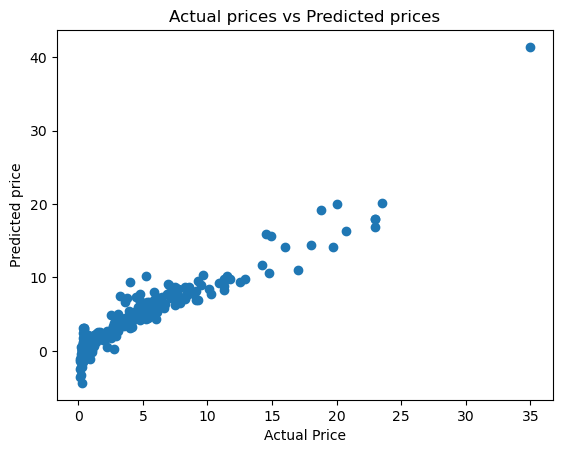

In [99]:
plt.scatter(y_train, model.predict(x_train))
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices")
plt.show()

#### Visualize the actual prices and predicted prices on testing data

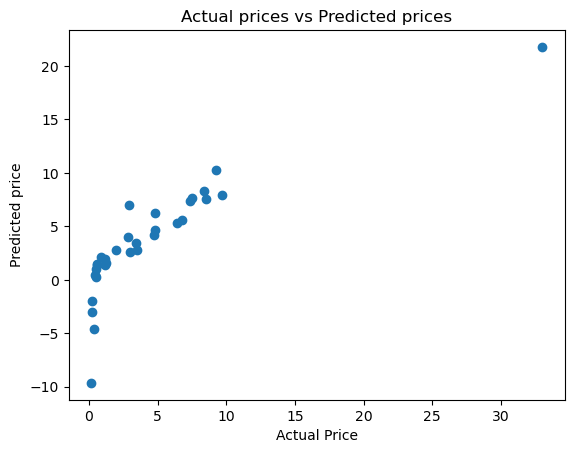

In [100]:
plt.scatter(y_test, model.predict(x_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices")
plt.show()

### Model training

#### Lasso Regression

In [101]:
model=Lasso()

In [102]:
model.fit(x_train, y_train)

Lasso()

#### Prediction on training data

In [103]:
print("Accuracy: ",model.score(x_train,y_train) * 100)

Accuracy:  84.71719819419413


#### Prediction on test data

In [104]:
print("Accuracy: ",model.score(x_test,y_test) * 100)

Accuracy:  75.30778432556812


#### Visualize the actual prices and predicted prices on training data

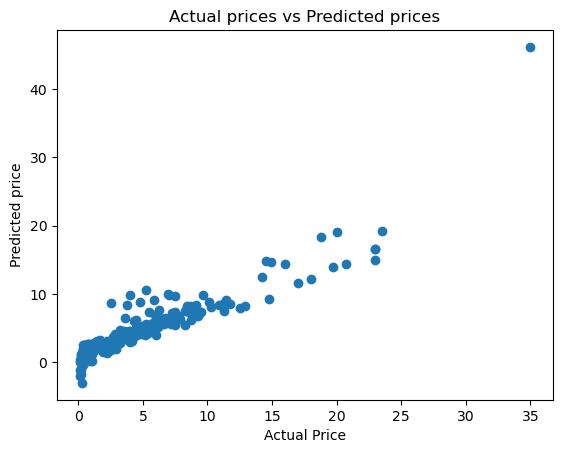

In [105]:
plt.scatter(y_train, model.predict(x_train))
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices")
plt.show()

#### Visualize the actual prices and predicted prices on testing data

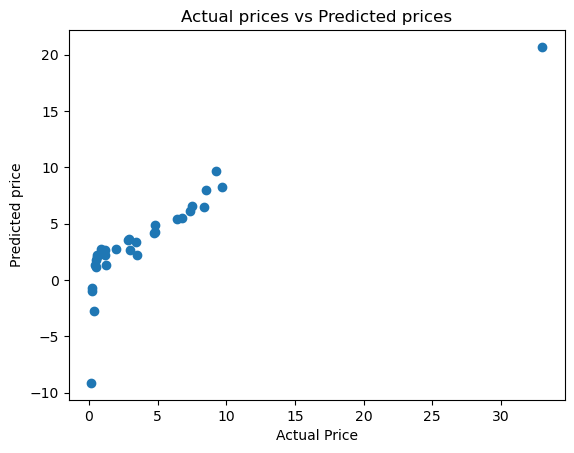

In [106]:
plt.scatter(y_test, model.predict(x_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices")
plt.show()